In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
eqDir = r'/data/new_trap/20210622/bead1/Neutrality2/HeightScan200V/m6_2/'
eqFiles = load_dir(eqDir, start_file=0,max_file=505)

100%|██████████| 505/505 [00:13<00:00, 37.84it/s]

505  files in folder
505  files loaded


In [3]:
meanX2=[]
for element in range(505):
    meanX2.append(np.mean(eqFiles[element].x2))

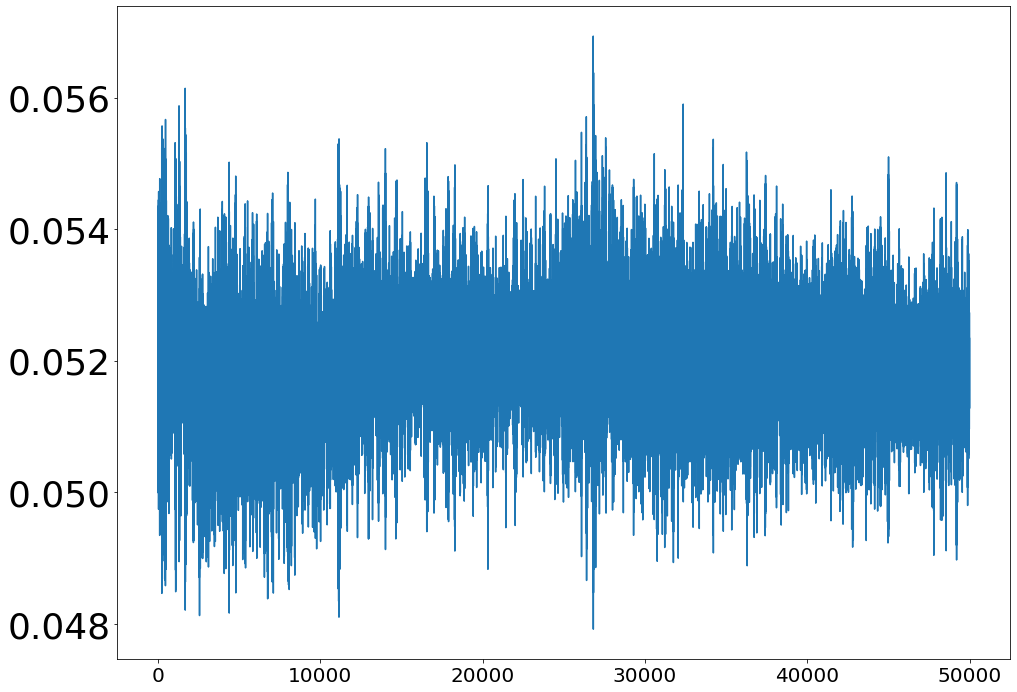

In [4]:
plt.plot(eqFiles[340].x2)

In [5]:
time1 = 1625784588
time2 = 1625784614
time3 = 1625787220

In [28]:
def makePSD(file):
    fsamp= 5000
    res = 50000
    data=file.z2
    trigger = file.trigger
    data_det=signal.detrend(data)
    xpsd, freqs = matplotlib.mlab.psd(data_det, Fs = fsamp, NFFT = res)
    return freqs,xpsd

In [29]:
@gif.frame
def plot_eqPSDS(i):
    file = eqFiles[i]
    timing = file.time[0]/1e9 - time1
    freqs,xpsd = makePSD(file)
    plt.loglog(freqs,xpsd,alpha=0.5, color="red",label="%d s from earthquake #1" %timing)
    plt.text(x=1.5e3,y=np.max(xpsd),s="%d"%i,color="red")
    refFile = eqFiles[300]
    freqs,xpsd2=makePSD(refFile)
    plt.loglog(freqs,xpsd2,alpha=0.5, color="black",label="comparison data")
    plt.ylabel("z PSD [a.u]")
    plt.xlabel("frequency [Hz]")
    plt.legend()
frames = []
for i in np.arange(303,343):
    frame = plot_eqPSDS(i) 
    frames.append(frame)
    #y2 = df_nos1["spin_fft"][i+2*step_size:i+3*step_size].mean()

gif.save(frames, "EQZ.gif", duration=3000)  
